In [4]:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html

# 1. Import the necessary libraries if you are starting a new notebook.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Using the same data as the previous lab: we_fn_use_c_marketing_customer_value_analysis.csv

customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

In [5]:
cols = []
for column in range(len(customer_df.columns)):
    cols.append(customer_df.columns[column].lower().replace(' ', '_')) 
customer_df.columns = cols

In [6]:
pd.set_option('display.max_columns', None)
# customer_df.head()

In [7]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'], errors='coerce')
# customer_df

In [8]:
# 2. Find  all of the categorical data.  Save it in a categorical_df variable.
categorical_df = customer_df.select_dtypes(object)
# categorical_df.head(20)

In [9]:
# 3. Check for NaN values.
categorical_df.isnull().sum()

customer            0
state               0
response            0
coverage            0
education           0
employmentstatus    0
gender              0
location_code       0
marital_status      0
policy_type         0
policy              0
renew_offer_type    0
sales_channel       0
vehicle_class       0
vehicle_size        0
dtype: int64

In [10]:
# 4. Check all unique values of columns.
customer_df.columns.unique()

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [11]:
customer_df['state'].unique()

array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon'],
      dtype=object)

In [12]:
# 5. Check dtypes. Do they all make sense as categorical data?
customer_df.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [13]:
# 6. Does any column contain alpha and numeric data?  Decide how to clean it.
# Policy, renew_offer_type & customer, but they can keep being categoricals and be treated as such
# We could also make renew_offer_type as a numerical value, as it has 4 values that correspond to 4 offers. 

In [14]:
customer_df['renew_offer_type'].unique()

array(['Offer1', 'Offer3', 'Offer2', 'Offer4'], dtype=object)

In [15]:
# 7. Would you choose to do anything else to clean or wrangle the categorical data?  Comment your decisions.
customer_df['gender'].unique()
customer_df['location_code'].unique()
customer_df['coverage'].unique()

# after checking a couple of data I could change some parameters into numerical data; however, treating it as categorical data 
# has also sense; I would, therefore keep it the way it is.

array(['Basic', 'Extended', 'Premium'], dtype=object)

In [16]:
# 8. Compare policy_type and policy.  What information is contained in these columns.  Can you identify what is important?  
# 9. Check number of unique values in each column, can they be combined in any way to ease encoding?  Comment your thoughts and make those changes.

print(customer_df['policy_type'].unique())
print(customer_df['policy'].unique())

# Both columns contain the type/use the auto has; however, policy contains a sub-use/type. The information in policy could be
# divided to have as unique values 'L1', 'L2', 'L3' and not repeat the policy_type values.

['Corporate Auto' 'Personal Auto' 'Special Auto']
['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2'
 'Corporate L1' 'Personal L2' 'Special L1' 'Special L3']


# Lab | Feature extraction
For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs.

Instructions
Open the categoricals variable we created before.
categoricals = data.select_dtypes(np.object)
categoricals.head()
Plot all the categorical variables with the proper plot. What can you see?
There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?
Plot time variable. Can you extract something from it?

In [17]:
customer_categorical = customer_df.select_dtypes('object')
# customer_categorical

In [18]:
def funct_dis_con(df):
    continuous = pd.DataFrame()
    discrete = pd.DataFrame()

    for col in df.columns:
        if len(df[col].unique())> (df.shape[0]*.01):
            continuous[col] = df[col]
        else:
            discrete[col] = df[col]
    return continuous, discrete

continuous_df, discrete_df = funct_dis_con(customer_categorical)

In [19]:
# 2. Plot all the categorical variables with the proper plot. What can you see?
# https://seaborn.pydata.org/tutorial/categorical.html
def plot_one(df):
    for col in df.columns:
        sns.catplot(data=df,x=col, kind='count')
        plt.show()
    
# plot_one(discrete_df)

# We can easily see different tendencies according to each column that will allow us to make basic conclusions of the data and
# its users, specifically the Mode as for different preferences

In [20]:
# 3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?
# customer column is redundant as it is only an index; aside from that, the other columns can be valuable depending on the 
# information we want to obtain.

In [21]:
# !pip install --upgrade earthpy

In [22]:
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns
import pandas as pd
# import earthpy.spatial as es
# import earthpy.plot as ep
# import earthpy.mask as em
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [23]:
customer_df.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

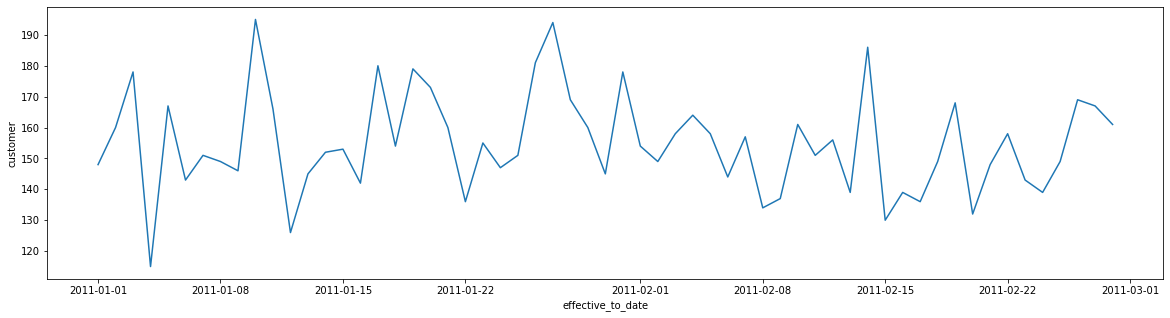

In [24]:
# 4. Plot time variable. Can you extract something from it?

time_df = customer_df[['effective_to_date', 'customer']]
time_df = time_df.groupby(['effective_to_date']).agg({'customer':pd.Series.nunique})

plt.figure(figsize=(20,5))
sns.lineplot(data=time_df, x='effective_to_date', y='customer')
plt.show()

# Lab | Random variable distributions
Refer to the files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv dataset.

Instructions

Get the numerical variables from our dataset.

Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.

Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

In [25]:
customer_numericals = customer_df.select_dtypes(include = np.number)
# customer_numericals

In [26]:
def plot_dist(df):
    for col in df.columns:
        sns.displot(x=df[col])
        plt.show()
# plot_dist(customer_numericals)


# fits 'better' the  theoretical normal distribution.
# customer_lifetime_value
#income
# months_since_policy_inception
# total_claim_amount

# fits 'better' the  theoretical exponential distribution.
# monthly premium auto
# months_since_last_claim
# number_of_open_complaints
# number_of_policies

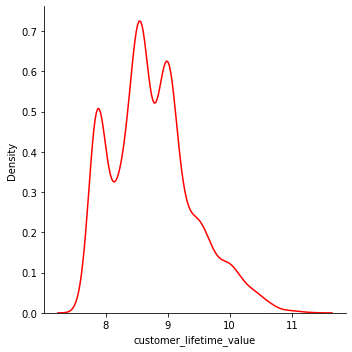

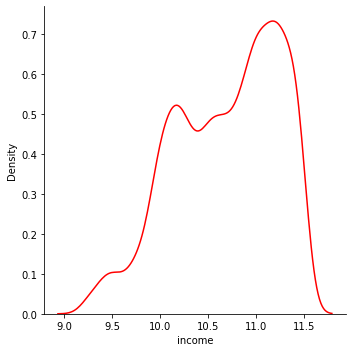

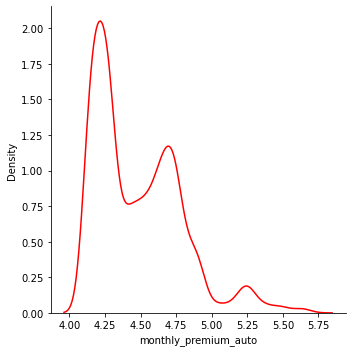

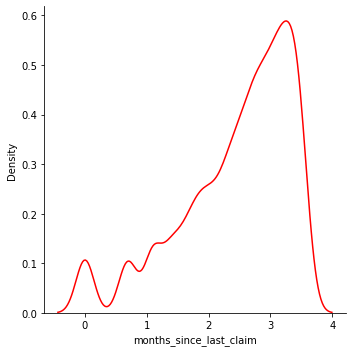

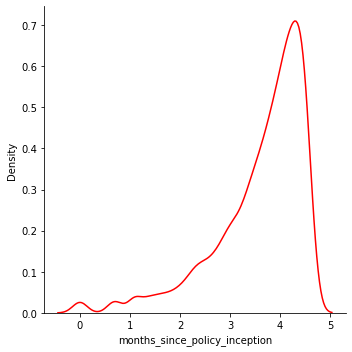

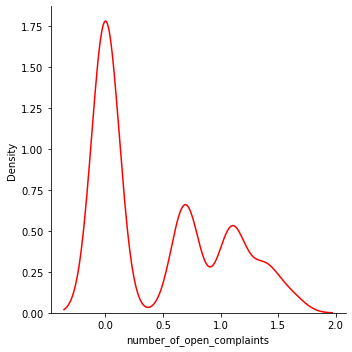

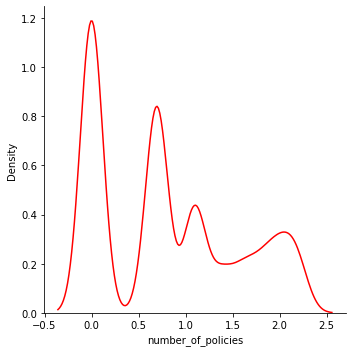

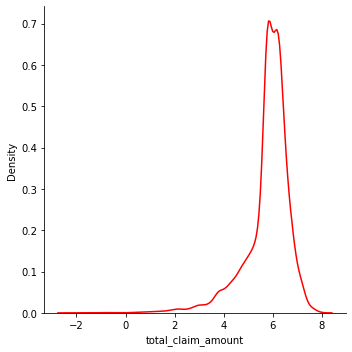

In [27]:
# Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.
def log_transform(x):
    x = np.log(x)
    if np.isfinite:
        return x
    else:
        return 0
    
data_log = pd.DataFrame()

for i in customer_numericals:
    data_log[i] = customer_numericals[i].apply(log_transform)
    sns.displot(data=data_log, x=i, kind='kde', color='red')

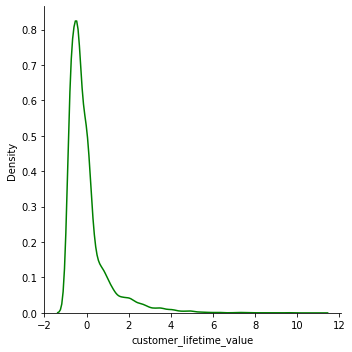

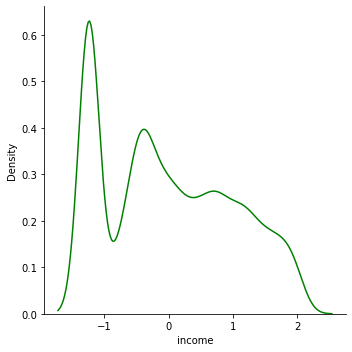

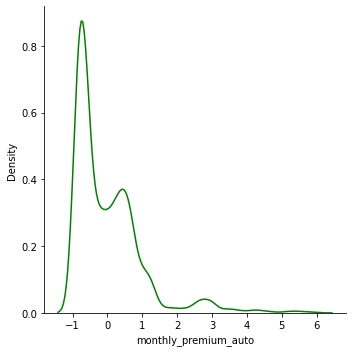

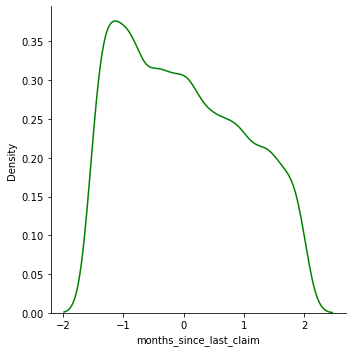

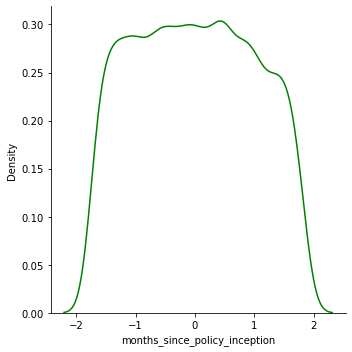

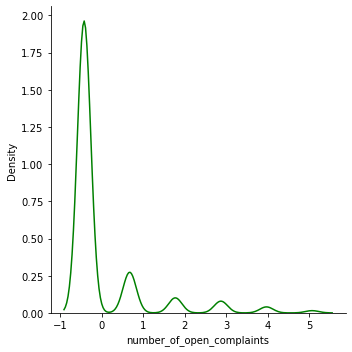

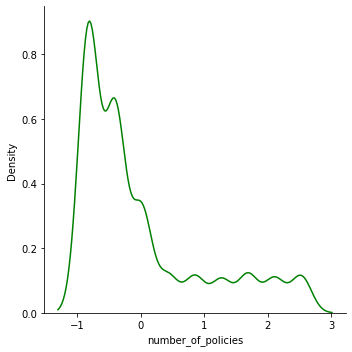

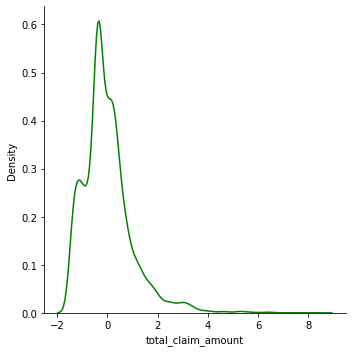

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(customer_numericals)
data_log = pd.DataFrame(scaler.transform(customer_numericals), columns=customer_numericals.columns).reset_index(drop=True)

for i in customer_numericals:
    sns.displot(data=data_log, x=i, kind = 'kde', color ="green")

# Lab | Comparing regression models
For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs.

Instructions
In this final lab, we will model our data. Import sklearn train_test_split and separate the data.

We will start with removing outliers, if you have not already done so. We have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.

Create a copy of the dataframe for the data wrangling.

Normalize the continuous variables. You can use any one method you want.

Encode the categorical variables (See the hint below for encoding categorical data!!!)

The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.

Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

Hint for Categorical Variables
You should deal with the categorical variables as shown below (for ordinal encoding, dummy code has been provided as well):

Encoder Type
One Hot:
- state
- marital status
- policy type
- policy
- renew offercustomer_df
- sales channel
- vehicle class

Ordinal:
- vehicle size
- coverage
- employmentstatus
- location code

Dummy code
data["coverage"] = data["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})

given that column "coverage" in the dataframe "data" has three categories:

"basic", "extended", and "premium" and values are to be represented in the same order.

8 Try a simple linear regression with all the data to see whether we are getting good results.

Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.

Use the function to check LinearRegressor and KNeighborsRegressor.

You can check also the MLPRegressor for this task!

Check and discuss the results.

In [29]:
# define a function to remove outliers and do so.

C:\Users\mfduh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mfduh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mfduh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mfduh\anaconda3\lib\si

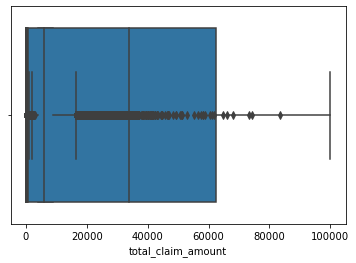

In [30]:
for column in customer_numericals:
    sns.boxplot(customer_numericals[column])
#     plt.show()

In [31]:
def detect_outlier(column):
    # find q1 and q3 values
    q1, q3 = np.percentile(sorted(column), [25, 75])
 
    # compute IQR
    iqr = q3 - q1
 
    # find lower and upper bounds
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
 
    outliers = [x for x in column if x <= lower_bound or x >= upper_bound]
 
    return outliers
 

In [32]:
# but... do I really want to take this outliers???  I don´t think so 
tca_outliers = detect_outlier(customer_numericals['total_claim_amount'])
# tca_outliers
mpa_outliers = detect_outlier(customer_numericals['monthly_premium_auto'])
# mpa_outliers

In [33]:
# Import sklearn train_test_split
from sklearn.model_selection import train_test_split

In [34]:
# customer_numericals
# customer_categorical

In [35]:
customer_categorical["education"].value_counts()

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

In [36]:
need = customer_categorical["education"].value_counts().index[:3]
customer_categorical["education"] = np.where(customer_categorical["education"].isin(need), customer_categorical["education"], 'Post-Uni')
customer_categorical["education"].value_counts()

Bachelor                2748
College                 2681
High School or Below    2622
Post-Uni                1083
Name: education, dtype: int64

In [37]:
# customer_categorical.loc[customer_categorical["vehicle_class"].isin(['Sports Car','Luxury SUV','Luxury Car'])] = "Luxury"
need = customer_categorical["vehicle_class"].value_counts().index[:3]
customer_categorical["vehicle_class"] = np.where(customer_categorical["vehicle_class"].isin(need), customer_categorical["vehicle_class"], 'Luxury')
customer_categorical["vehicle_class"].value_counts()

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Luxury            831
Name: vehicle_class, dtype: int64

In [38]:
# separate the data
y = pd.DataFrame(customer_df['total_claim_amount'])
X = pd.concat([customer_categorical, customer_numericals], axis=1)
# Create a copy of the dataframe for the data wrangling.
X.to_csv('fullDF_treated.csv', index=False)

In [39]:
X = X.drop(['total_claim_amount'], axis=1)
X = X.drop(['customer'], axis=1)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [41]:
# Categoricals & Numericals
X_num_train = X_train.select_dtypes(np.number)
X_cat_train = X_train.select_dtypes(object)

X_num_test = X_test.select_dtypes(np.number)
X_cat_test = X_test.select_dtypes(object)

In [42]:
# Normalize the continuous variables
from sklearn.preprocessing import MinMaxScaler 
# Train data
transformer = MinMaxScaler().fit(X_num_train)
x_normalized = transformer.transform(X_num_train)
data_normalized_train = pd.DataFrame(x_normalized, columns = X_num_train.columns)

# Test data
X_normalized_test = transformer.transform(X_num_test)
X_normalized_test = pd.DataFrame(X_normalized_test, columns=X_num_test.columns)

In [43]:
# Divide for Ordinal and OneHot Encoder
X_cat_train_onehot = X_cat_train.drop(['vehicle_size', 'coverage', 'employmentstatus','location_code','education'], axis=1)
X_cat_train_ordinal = X_cat_train.drop(['state','marital_status','policy_type','policy','renew_offer_type','sales_channel','vehicle_class','response','gender'], axis=1)

X_cat_test_onehot = X_cat_test.drop(['vehicle_size', 'coverage', 'employmentstatus','location_code','education'], axis=1)
X_cat_test_ordinal = X_cat_test.drop(['state','marital_status','policy_type','policy','renew_offer_type','sales_channel','vehicle_class','response','gender'], axis=1)

In [44]:
# One Hot Encoder categorical variables
from sklearn.preprocessing import OneHotEncoder
#Train data
encoder = OneHotEncoder(drop='first').fit(X_cat_train_onehot)
encoded = encoder.transform(X_cat_train_onehot).toarray()

cols = encoder.get_feature_names_out(input_features=X_cat_train_onehot.columns)
onehot_encoded_train = pd.DataFrame(encoded, columns=cols)

# Test data
encoded_test = encoder.transform(X_cat_test_onehot).toarray()
onehot_encoded_test = pd.DataFrame(encoded_test,columns=encoder.get_feature_names_out(X_cat_test_onehot.columns))

In [45]:
# Ordinal Encoder categorical variables
#Train Data
X_cat_train_ordinal["vehicle_size"] = X_cat_train_ordinal["vehicle_size"].map({"Small" : 0,"Medsize" : 0.5,  "Large" : 1})
X_cat_train_ordinal["coverage"] = X_cat_train_ordinal["coverage"].map({"Basic" : 0, "Extended" : .5, "Premium" : 1})
X_cat_train_ordinal["employmentstatus"] = X_cat_train_ordinal["employmentstatus"].map({"Unemployed" : 0, "Medical Leave" : 0,"Disabled" : 0, "Retired" : 0.5, "Employed" : 1})
X_cat_train_ordinal["education"] = X_cat_train_ordinal["education"].map({"High School or Below" : 0, "College" : .3, "Bachelor" : .8, "Post-Uni":1})
X_cat_train_ordinal["location_code"] = X_cat_train_ordinal["location_code"].map({"Rural" : 0, "Suburban" : .5, "Urban" : 1})

# Test data
X_cat_test_ordinal["vehicle_size"] = X_cat_test_ordinal["vehicle_size"].map({"Small" : 0,"Medsize" : 0.5,  "Large" : 1})
X_cat_test_ordinal["coverage"] = X_cat_test_ordinal["coverage"].map({"Basic" : 0, "Extended" : .5, "Premium" : 1})
X_cat_test_ordinal["employmentstatus"] = X_cat_test_ordinal["employmentstatus"].map({"Unemployed" : 0, "Medical Leave" : 0,"Disabled" : 0, "Retired" : 0.5, "Employed" : 1})
X_cat_test_ordinal["education"] = X_cat_test_ordinal["education"].map({"High School or Below" : 0, "College" : .3, "Bachelor" : .8, "Post-Uni":1})
X_cat_test_ordinal["location_code"] = X_cat_test_ordinal["location_code"].map({"Rural" : 0, "Suburban" : .5, "Urban" : 1})

In [46]:
data_normalized_train

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,0.027234,0.524254,0.177966,0.057143,0.272727,0.0,0.000
1,0.088149,0.377367,0.233051,0.228571,0.232323,0.0,0.875
2,0.073385,0.000000,0.055085,0.685714,0.828283,0.0,0.125
3,0.150854,0.000000,0.046610,0.428571,0.919192,0.4,0.125
4,0.133466,0.000000,0.237288,0.371429,0.474747,0.0,0.125
...,...,...,...,...,...,...,...
7302,0.011793,0.819250,0.050847,0.571429,0.707071,0.6,0.000
7303,0.040100,0.355909,0.292373,0.028571,0.060606,0.0,0.000
7304,0.082816,0.789348,0.203390,0.285714,0.383838,0.0,1.000
7305,0.073144,0.425986,0.161017,0.028571,0.575758,0.0,0.500


In [47]:
onehot_encoded_train

,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,gender_M,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Two-Door Car
0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7302,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7303,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7304,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
7305,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [48]:
X_cat_train_ordinal= X_cat_train_ordinal.reset_index(drop= True)
X_cat_train_ordinal

,coverage,education,employmentstatus,location_code,vehicle_size
0,1.0,0.0,1.0,0.5,0.5
1,0.0,1.0,1.0,0.0,0.5
2,0.0,0.0,0.0,0.5,0.5
3,0.0,0.3,0.0,0.5,0.5
4,0.0,0.8,0.0,0.5,0.5
...,...,...,...,...,...
7302,0.0,0.8,1.0,0.0,0.5
7303,0.5,0.0,1.0,1.0,0.5
7304,0.0,0.8,1.0,0.0,1.0
7305,0.5,0.8,1.0,0.5,0.0


In [49]:
# Train data
X_train_encoded = pd.concat([data_normalized_train,onehot_encoded_train,X_cat_train_ordinal],axis=1)
X_train_encoded

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,gender_M,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Two-Door Car,coverage,education,employmentstatus,location_code,vehicle_size
0,0.027234,0.524254,0.177966,0.057143,0.272727,0.0,0.000,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.5,0.5
1,0.088149,0.377367,0.233051,0.228571,0.232323,0.0,0.875,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.5
2,0.073385,0.000000,0.055085,0.685714,0.828283,0.0,0.125,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.5,0.5
3,0.150854,0.000000,0.046610,0.428571,0.919192,0.4,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.3,0.0,0.5,0.5
4,0.133466,0.000000,0.237288,0.371429,0.474747,0.0,0.125,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.8,0.0,0.5,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7302,0.011793,0.819250,0.050847,0.571429,0.707071,0.6,0.000,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.8,1.0,0.0,0.5
7303,0.040100,0.355909,0.292373,0.028571,0.060606,0.0,0.000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.5,0.0,1.0,1.0,0.5
7304,0.082816,0.789348,0.203390,0.285714,0.383838,0.0,1.000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.8,1.0,0.0,1.0
7305,0.073144,0.425986,0.161017,0.028571,0.575758,0.0,0.500,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.5,0.8,1.0,0.5,0.0


In [50]:
onehot_encoded_test

,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,gender_M,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Two-Door Car
0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1823,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1824,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1825,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [51]:
X_normalized_test

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,0.082741,0.131341,0.237288,0.428571,0.939394,0.0,0.625
1,0.029094,0.436990,0.194915,0.342857,0.737374,0.0,0.000
2,0.252380,0.000000,0.072034,0.200000,0.636364,0.0,0.125
3,0.035277,0.129691,0.016949,0.057143,0.373737,0.0,0.375
4,0.063253,0.204240,0.135593,0.942857,0.686869,0.0,0.750
...,...,...,...,...,...,...,...
1822,0.088020,0.400216,0.224576,0.971429,0.181818,0.2,0.750
1823,0.486246,0.377627,0.508475,0.600000,0.222222,0.4,0.125
1824,0.088670,0.564680,0.224576,0.057143,0.080808,0.0,0.250
1825,0.069240,0.697012,0.004237,0.400000,0.181818,0.2,0.125


In [52]:
X_cat_test_ordinal= X_cat_test_ordinal.reset_index(drop= True)
X_cat_test_ordinal

,coverage,education,employmentstatus,location_code,vehicle_size
0,0.0,0.8,0.0,0.5,0.5
1,0.0,0.8,1.0,0.0,0.5
2,0.5,0.3,0.0,0.5,0.5
3,0.0,0.3,0.0,0.5,0.5
4,0.5,0.3,0.0,0.5,0.0
...,...,...,...,...,...
1822,1.0,0.8,1.0,0.0,0.5
1823,0.0,0.3,1.0,0.5,0.0
1824,0.0,0.0,1.0,0.5,0.5
1825,0.0,0.0,1.0,0.5,0.5


In [53]:
X_cat_test_ordinal

,coverage,education,employmentstatus,location_code,vehicle_size
0,0.0,0.8,0.0,0.5,0.5
1,0.0,0.8,1.0,0.0,0.5
2,0.5,0.3,0.0,0.5,0.5
3,0.0,0.3,0.0,0.5,0.5
4,0.5,0.3,0.0,0.5,0.0
...,...,...,...,...,...
1822,1.0,0.8,1.0,0.0,0.5
1823,0.0,0.3,1.0,0.5,0.0
1824,0.0,0.0,1.0,0.5,0.5
1825,0.0,0.0,1.0,0.5,0.5


In [54]:
# Test Data
X_test_encoded= pd.concat([X_normalized_test,onehot_encoded_test,X_cat_test_ordinal],axis=1)
X_test_encoded 

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,gender_M,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Two-Door Car,coverage,education,employmentstatus,location_code,vehicle_size
0,0.082741,0.131341,0.237288,0.428571,0.939394,0.0,0.625,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.8,0.0,0.5,0.5
1,0.029094,0.436990,0.194915,0.342857,0.737374,0.0,0.000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.8,1.0,0.0,0.5
2,0.252380,0.000000,0.072034,0.200000,0.636364,0.0,0.125,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.3,0.0,0.5,0.5
3,0.035277,0.129691,0.016949,0.057143,0.373737,0.0,0.375,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.3,0.0,0.5,0.5
4,0.063253,0.204240,0.135593,0.942857,0.686869,0.0,0.750,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.5,0.3,0.0,0.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,0.088020,0.400216,0.224576,0.971429,0.181818,0.2,0.750,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.8,1.0,0.0,0.5
1823,0.486246,0.377627,0.508475,0.600000,0.222222,0.4,0.125,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.3,1.0,0.5,0.0
1824,0.088670,0.564680,0.224576,0.057143,0.080808,0.0,0.250,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.5,0.5
1825,0.069240,0.697012,0.004237,0.400000,0.181818,0.2,0.125,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.5,0.5


In [55]:
# Check and make sure that every column is numerical, if some are not, change it using encoding.
# done

In [56]:
# 8 Try a simple linear regression with all the data to see whether we are getting good results.
from sklearn import linear_model
lm = linear_model.LinearRegression()
lm.fit(X_train_encoded,y_train)

from sklearn.metrics import r2_score
predictions = lm.predict(X_train_encoded)
print('R2 y_train: ', r2_score(y_train, predictions))

predictions_test = lm.predict(X_test_encoded)
print('R2 y_test: ', r2_score(y_test, predictions_test))

from sklearn.metrics import mean_squared_error

mse=mean_squared_error(y_test,predictions_test)
print('MSE test: ',mse)

rmse = np.sqrt(mean_squared_error(y_test,predictions_test))
print('RMSE test: ',rmse)

R2 y_train:  0.5377717270411408
R2 y_test:  0.5076723427974952
MSE test:  39130.7812021814
RMSE test:  197.8150176356219


In [62]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor

In [59]:
#Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.
# Use the function to check LinearRegressor and KNeighborsRegressor.
# You can check also the MLPRegressor for this task!
def models_automation(models, X_train_encoded, y_train,X_test_encoded, y_test):
    for model in models:
        model.fit(X_train_encoded, y_train)
        print(f"{model.__class__.__name__}: Train -> {model.score(X_train_encoded, y_train)}, Test -> {model.score(X_test_encoded, y_test)}")

In [64]:
model_list = [LinearRegression(),SGDRegressor(),KNeighborsRegressor(), MLPRegressor(),DecisionTreeRegressor(),RandomForestRegressor()]
models_automation(model_list, X_train_encoded, y_train,X_test_encoded, y_test)


LinearRegression: Train -> 0.5377717270411408, Test -> 0.5076723427974952
SGDRegressor: Train -> 0.6234168216142035, Test -> 0.6102635993788965


C:\Users\mfduh\anaconda3\lib\site-packages\sklearn\utils\validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KNeighborsRegressor: Train -> 0.6263536066742622, Test -> 0.4555598343118826


C:\Users\mfduh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mfduh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor: Train -> 0.6633839125266365, Test -> 0.6531531067058115
DecisionTreeRegressor: Train -> 1.0, Test -> 0.7105112895402741


C:\Users\mfduh\AppData\Local\Temp\ipykernel_28208\1962118242.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_encoded, y_train)


RandomForestRegressor: Train -> 0.9775644566502426, Test -> 0.8424744744807352


In [ ]:
# Check and discuss the results.

# RandomForestRegressor seems to have the bes results